# Digit Recognition Using SVM



## Data Understanding 



In [1]:
# importing required libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale


# checking the dataset
digits = pd.read_csv("D:/Sushma/Data Science/Machine Learning/Super Vector Machines/digit-recognizer/train.csv")
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# about the dataset

#Checking the dimensions of the data set
print("Dimensions: ", digits.shape, "\n")

Dimensions:  (42000, 785) 



In [3]:
#Checking the information of the data set
print(digits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


In [4]:
#Checking the head of the data set
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Checking the column names of the data set
print(digits.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [7]:
#Checking the unique values of the labels
order = list(np.sort(digits['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [8]:
#Checking the count of each labelavailable in the data set
digits['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

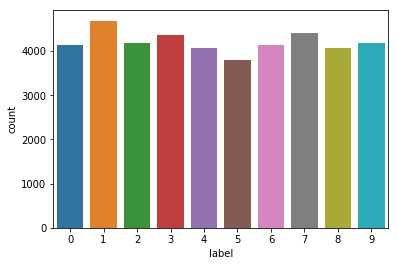

In [9]:
#Plotting the count of each label in the data set
sns.countplot(digits.label)
plt.show()

In [10]:
#Checking the mean values of all the labels
digits_means = digits.groupby('label').mean()
digits_means.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Preparation

In [11]:
# average feature values
round(digits.drop('label', axis=1).mean(), 2)

pixel0      0.00
pixel1      0.00
pixel2      0.00
pixel3      0.00
pixel4      0.00
pixel5      0.00
pixel6      0.00
pixel7      0.00
pixel8      0.00
pixel9      0.00
pixel10     0.00
pixel11     0.00
pixel12     0.00
pixel13     0.01
pixel14     0.01
pixel15     0.00
pixel16     0.00
pixel17     0.00
pixel18     0.00
pixel19     0.00
pixel20     0.00
pixel21     0.00
pixel22     0.00
pixel23     0.00
pixel24     0.00
pixel25     0.00
pixel26     0.00
pixel27     0.00
pixel28     0.00
pixel29     0.00
            ... 
pixel754    0.00
pixel755    0.00
pixel756    0.00
pixel757    0.00
pixel758    0.00
pixel759    0.00
pixel760    0.00
pixel761    0.01
pixel762    0.04
pixel763    0.08
pixel764    0.11
pixel765    0.18
pixel766    0.30
pixel767    0.41
pixel768    0.51
pixel769    0.56
pixel770    0.68
pixel771    0.60
pixel772    0.49
pixel773    0.34
pixel774    0.22
pixel775    0.12
pixel776    0.06
pixel777    0.02
pixel778    0.02
pixel779    0.00
pixel780    0.00
pixel781    0.

In [12]:
# Checking for null values in the columns
digits.isnull().sum().sort_values(ascending=False).sort_values(ascending=False)

label       0
pixel0      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel45     0
pixel95     0
pixel1      0
pixel21     0
pixel389    0
pixel22     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel755    0
pixel756    0
pixel757    0
pixel735    0
pixel686    0
pixel738    0
pixel737    0
pixel758    0
pixel773    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel761    0
pixel771    0
pixel774    0
pixel759    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel772    0
pixel760    0
pixel783    0
Length: 785, dtype: int64

In [13]:
# Splitting the data set into X and y
X = digits.drop("label", axis = 1)
y = digits['label']

In [14]:
# Splitting the data set into train and test sets in the ratio of 20:80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)

In [15]:
#importing StandardScaler
from sklearn.preprocessing import StandardScaler

In [16]:
#Creating the standard scaler
scaler = StandardScaler()

In [17]:
#Scaling the train and test data sets
X_train =  scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


## Model Building

### Linear Model

In [18]:
# Building linear model
model_linear = SVC(kernel='linear')

# Fitting the model and training data set
model_linear.fit(X_train, y_train)

# Predicting the values using the linear model
y_pred = model_linear.predict(X_test)


In [19]:
# confusion matrix and accuracy of the linear model

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion 
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9038888888888889 

[[3614    0   11   10    6   31   26    6    9    2]
 [   0 4091   17   23    9    2    3   12   24    4]
 [  50   46 3365   63   73   16   53   52   61   11]
 [  20   27  119 3391    8  180    5   53   58   39]
 [  10   12   29    2 3397    6   41   42    4  159]
 [  48   42   31  174   43 2901   55   13   82   29]
 [  34   16   56    5   33   37 3485    4   23    0]
 [   9   26   36   23   70   11    4 3620   13  142]
 [  27   89   70  136   24  138   31   27 3087   36]
 [  36   12   41   28  187   19    1  212   26 3216]]


### Polynomial Model

In [20]:
#Building polynomial model
#Using poly kernel with C=1, default value of gamma
non_linear_model = SVC(kernel='poly')

# Fitting the model and training data set
non_linear_model.fit(X_train, y_train)

# Predicting the values using the polynomial model
y_pred = non_linear_model.predict(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [21]:
# Confusion matrix and accuracy of the polynomial model

# Accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# Confusion Matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.7600793650793651 

[[3041    0   19    6    0   22   22    1  596    8]
 [   0 4131    8    0    1    0    5    0   39    1]
 [  17   76 2284   47   19    3   14   20 1293   17]
 [   0   67   27 2600    2   18    1   10 1120   55]
 [   2   67   18    2 2249   16    3   15  556  774]
 [   3   30   11  111    9 1804   32    7 1334   77]
 [   6   51   34    0   20   23 2948    3  607    1]
 [   1  109    5    2   13    2    0 2730  324  768]
 [   1   50   27   29    4   56    1    3 3468   26]
 [   6   31    4   12   33    3    0   41  172 3476]]


### RBF Model

In [22]:
# Building RBF model
# Using rbf kernel with C=1, default value of gamma
non_linear_model = SVC(kernel='rbf')

# Fitting the model and training data set
non_linear_model.fit(X_train, y_train)

# Predicting the values using the rbf model
y_pred = non_linear_model.predict(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [23]:
# Confusion matrix and accuracy of rbf model

# Accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# Confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9224074074074075 

[[3579    0   16    9    3   13   50   21   23    1]
 [   0 4106   14   16    6    1    6   21    9    6]
 [  24   20 3393   59   40    7   35  153   52    7]
 [   3   18   90 3518    4   74    9   84   69   31]
 [   4   10   46    3 3428   11   21   64    6  109]
 [  19   22   31  114   17 2984   79   90   33   29]
 [  32   10   18    1   11   29 3504   65   23    0]
 [   3   26   27    8   30    6    1 3757    6   90]
 [  12   52   43   78   21   95   23   63 3237   41]
 [  22   10   13   46   96    8    0  201   21 3361]]


As the accuracy of rbf model is better among the three models,going ahead with the rbf model.

## Grid Search: Hyperparameter Tuning

In [24]:
# Creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# Specifying the range of hyperparameters
hyper_params = [ {'gamma': [0.01,0.001,0.0001],
                     'C': [0.1,1,10,100]}]


#Using the rbf model
model = SVC(kernel="rbf")

#Setting up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# Fitting the model to training data set
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 14.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [25]:
# Checking the cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,50.013061,0.767130,6.069347,0.098997,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.266667,0.229762,0.219048,...,0.230714,0.019187,12,0.292262,0.275893,0.245536,0.248512,0.252083,0.262857,0.018201
1,32.957085,0.715844,5.954941,0.204785,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.829762,0.819048,0.819048,...,0.826429,0.006272,7,0.848810,0.853274,0.860417,0.858333,0.854464,0.855060,0.004050
2,51.221730,2.757873,6.656981,0.195162,0.1,0.0001,"{'C': 0.1, 'gamma': 0.0001}",0.496429,0.477381,0.469048,...,0.471429,0.018973,11,0.485417,0.480655,0.475000,0.474405,0.484821,0.480060,0.004676
3,52.135582,4.116262,6.197555,0.262902,1,0.01,"{'C': 1, 'gamma': 0.01}",0.705952,0.740476,0.726190,...,0.725476,0.023153,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,16.147524,1.194308,4.233242,0.480388,1,0.001,"{'C': 1, 'gamma': 0.001}",0.914286,0.913095,0.915476,...,0.917619,0.004151,3,0.965774,0.971726,0.970238,0.971131,0.965476,0.968869,0.002692
5,23.020517,0.521997,5.218899,0.103157,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.871429,0.867857,0.872619,...,0.874048,0.006089,6,0.900000,0.898810,0.897619,0.896429,0.899107,0.898393,0.001243
6,50.289876,1.571772,6.001743,0.070640,10,0.01,"{'C': 10, 'gamma': 0.01}",0.723810,0.752381,0.746429,...,0.742143,0.018529,8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,13.593377,0.205335,3.676810,0.064274,10,0.001,"{'C': 10, 'gamma': 0.001}",0.914286,0.917857,0.917857,...,0.923095,0.008670,1,0.999405,0.999405,0.999405,0.999405,0.999702,0.999464,0.000119
8,10.700612,0.200120,3.342791,0.079590,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.898810,0.898810,0.913095,...,0.913333,0.013093,4,0.955952,0.963095,0.957143,0.961607,0.957143,0.958988,0.002820
9,50.704500,1.011544,5.909138,0.147667,100,0.01,"{'C': 100, 'gamma': 0.01}",0.723810,0.752381,0.746429,...,0.742143,0.018529,8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


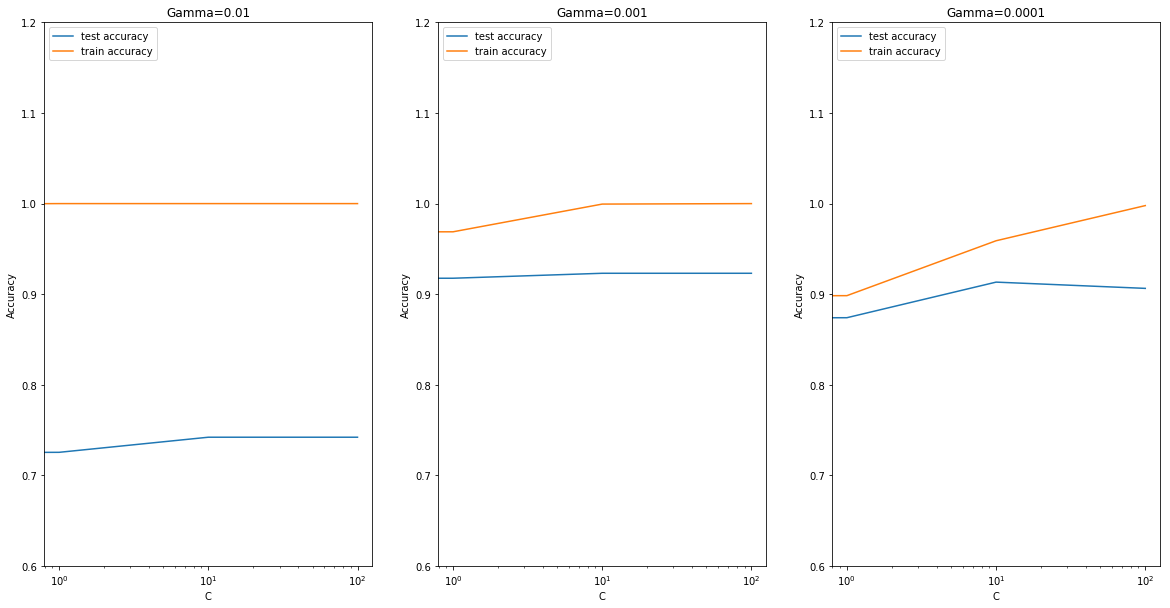

In [27]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(20,10))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')




In [28]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9230952380952381 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


## Building and Evaluating the Final Model

In [29]:
# Building the model with optimal hyperparameters selected from the above steps

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

#Fitting the model to the training dataset
model.fit(X_train, y_train)

#Predicting the labels of test data set
y_pred = model.predict(X_test)



In [30]:
# Confusion matrix of the test data set
print("confusion matrix","\n", metrics.confusion_matrix(y_test, y_pred), "\n")


confusion matrix 
 [[3610    0   11   10    3   11   42   15   11    2]
 [   0 4106   14   18    7    2    5   21    8    4]
 [  29   20 3421   55   33    4   41  136   40   11]
 [   8   10   92 3547    5   87    4   74   43   30]
 [   4   10   34    3 3448   11   33   57    3   99]
 [  20   20   25  117   19 3028   59   72   30   28]
 [  27    7   15    1    9   26 3539   52   17    0]
 [   5   24   26   10   44    5    1 3752    9   78]
 [  11   39   44   81   21   81   27   64 3273   24]
 [  15    7   17   28   93   12    0  192   15 3399]] 



In [31]:
from sklearn.metrics import classification_report

#Classwise precision,recall,f1 score of the test data set
print(classification_report(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3715
           1       0.97      0.98      0.97      4185
           2       0.92      0.90      0.91      3790
           3       0.92      0.91      0.91      3900
           4       0.94      0.93      0.93      3702
           5       0.93      0.89      0.91      3418
           6       0.94      0.96      0.95      3693
           7       0.85      0.95      0.89      3954
           8       0.95      0.89      0.92      3665
           9       0.92      0.90      0.91      3778

   micro avg       0.93      0.93      0.93     37800
   macro avg       0.93      0.93      0.93     37800
weighted avg       0.93      0.93      0.93     37800



In [32]:
#Classwise accuracy of the test data set

conf_mat= metrics.confusion_matrix(y_test, y_pred)
total=0
for i in range (0,len(conf_mat)):
    for j in range (0,len(conf_mat[i])):
        total=total+conf_mat[i][j]
    class_accu=conf_mat[i][i]/total
    total=0
    print("The accuracy of class {0} is {1}".format(i, class_accu))

The accuracy of class 0 is 0.971736204576043
The accuracy of class 1 is 0.9811230585424133
The accuracy of class 2 is 0.9026385224274406
The accuracy of class 3 is 0.9094871794871795
The accuracy of class 4 is 0.9313884386817937
The accuracy of class 5 is 0.8858981860737273
The accuracy of class 6 is 0.9582994855131329
The accuracy of class 7 is 0.9489124936772888
The accuracy of class 8 is 0.8930422919508868
The accuracy of class 9 is 0.8996823716251985


In [46]:
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")

accuracy 0.9291798941798942 



In [47]:
print("precision:", metrics.precision_score(y_test,y_pred,average='micro'), "\n")


precision: 0.9291798941798942 



In [48]:
print("recall:", metrics.recall_score(y_test,y_pred,average='micro'), "\n")


recall: 0.9291798941798942 



## Conclusion

The accuracy achieved using a non-linear rbf kernel is better than linear and polynomial models.So,we can conclude that the data is non-linear in nature.But as the model performed better for low values of gamma, it shows that the data is not highly non linear in nature